In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def graph_to_adj_matrix(graph):
    A = nx.to_numpy_matrix(graph)
    A = A.astype(np.int64)
    return A

def adj_matrix_to_list(adj_mat):
    ''' Convert an adjacency matrix (numpy 2d array) to list of important values '''
    n = adj_mat.shape[0] - 1
    adj_list = []
    
    for i in range(n):
        adj_list += adj_mat[i,i+1:].A1.tolist()
    
    return adj_list

def graph_to_adj_list(graph):
    A = graph_to_adj_matrix(graph)
    return adj_matrix_to_list(A)
    
def adj_list_to_matrix(adj_list):
    li_of_li = []
    n = int((-1 + (1 + 8*len(adj_list))**.5)/2)
    A = np.zeros((n+1, n+1), int)
    
    j = n
    i = 0
    m = 0
    
    while m < n:
        A[m,m+1:] = adj_list[i:j]
        i = j
        j = i + n - (m + 1)
        m += 1
    
    A = A + A.T
    
    return A

def adj_list_to_graph(adj_list):
    A = adj_list_to_matrix(adj_list)
    return nx.convert_matrix.from_numpy_matrix(A)

def adj_matrix_to_graph(adj_mat):
    return nx.convert_matrix.from_numpy_matrix(adj_mat)

### Generate a new graph and plot

In [2]:
G = nx.gnm_random_graph(12, 20)
pos = nx.spring_layout(G)

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

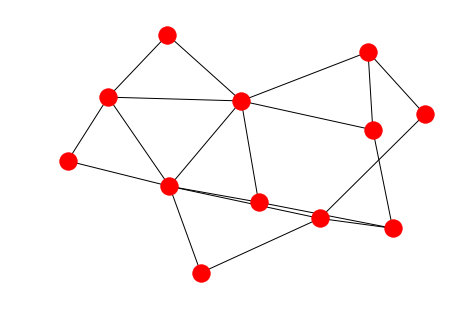

In [29]:
nx.draw(G, pos=pos)
plt.show()

### Convert graph adjacency matrix to list and back again, and plot in same layout

In [30]:
A = graph_to_adj_list(G)
len(A)

66

In [31]:
B = adj_list_to_graph(a_list)
B.nodes()

(12, 12)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

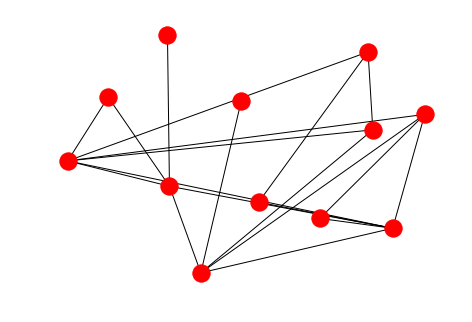

In [32]:
nx.draw(B, pos=pos)
plt.show()

0.2711111111111111


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

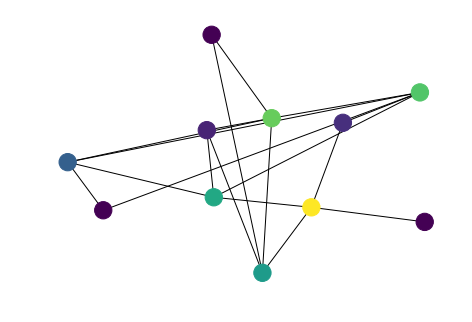

In [7]:
H = mutate_graph(G, 0)
c_b = list(nx.betweenness_centrality(H).values())
print(max(c_b) - min(c_b))

nx.draw(H, pos=pos, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

### Create new graph with randomly modified edges

In [2]:
from random import sample
# Function to create new graph with randomly modified edges
def mutate_graph(G, n_mut):
    a_list = graph_to_adj_list(G)
    
    rs = sample(range(len(a_list)), n_mut)
    for r in rs:
        a_list[r] ^= 1
    
    B = adj_list_to_matrix(a_list)
    H = nx.convert_matrix.from_numpy_matrix(B)
    
    return H
# Convert to list, randomly select list value and change it, convert to matrix

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

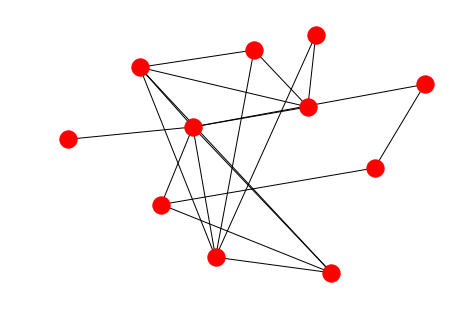

In [266]:
H = mutate_graph(G, 10)
nx.draw(H, pos=pos)
plt.show()

### Calculate cost of new graph

In [3]:
def new_cost(n_list, p_list):
    S = np.bitwise_xor(adj_list_to_matrix(n_list), adj_list_to_matrix(p_list))
    cost = S.sum()/2
    
    return cost

def plot_diff(N, P):
    S = np.bitwise_xor(graph_to_adj_matrix(N), graph_to_adj_matrix(P))
    nx.draw(adj_matrix_to_graph(S), pos=pr_pos, node_size=100)
    plt.show()

### Calculate Resilience

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

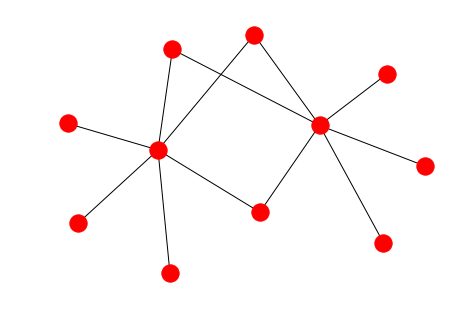

In [15]:
test_adj_list = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
test_adj_mat = adj_list_to_matrix(test_adj_list, 10)
T = nx.convert_matrix.from_numpy_matrix(test_adj_mat)

# T = nx.gnm_random_graph(10, 20)
t_pos = nx.spring_layout(T)

nx.draw(T, pos=t_pos)
plt.show()

[0.0, 0.0, 0.0, 0.5666666666666667, 0.11851851851851852, 0.11851851851851852, 0.11851851851851852, 0.5666666666666667, 0.0, 0.0, 0.0]
0.5666666666666667


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

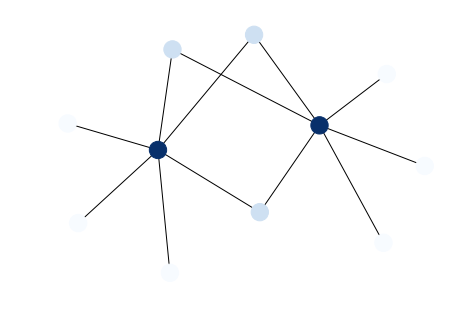

In [19]:
# c_e = list(nx.eigenvector_centrality(T).values())
# c_d = list(nx.degree_centrality(T).values())
c_b = list(nx.betweenness_centrality(T).values())
# c_c = list(nx.closeness_centrality(T).values())
# c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]

# print(c_d)
print(c_b)
print(max(c_b) - min(c_b))
# print(c_c)

nx.draw(T, pos=t_pos, node_color=c_b, cmap=plt.cm.Blues)
plt.show()

In [211]:
H = mutate_graph(G, 10)
c_b = list(nx.betweenness_centrality(H).values())
print(max(c_b) - min(c_b))

nx.draw(U, pos=t_pos, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

9
0.3819444444444444


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

ValueError: Invalid RGBA argument: 0.09027777777777778

### Import Puerto Rico Power Grid Network

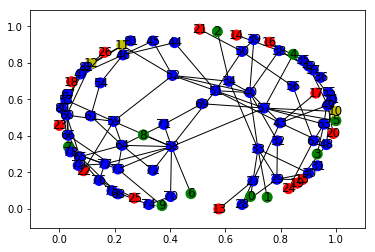

In [7]:
# generation_plants = {'Costa Sur':, 'EcoElectrica', 'Aguirre 1', 'Aguirre 2', 'Cambalache', 'Palo Seco Plant', 'San Juan 1 Plant', 'San Juan 2 Plant', 'Guayama Plant', 'Mayaguez Plant'}

pr_adj = np.genfromtxt('data/pr_power_grid.csv', delimiter=',')
P = nx.convert_matrix.from_numpy_matrix(pr_adj)

pr_pos = nx.spring_layout(P)
pr_colors = ['g']*10 + ['y']*3 + ['r']*14 + ['b']*56


nx.draw_networkx(P, pos=pr_pos, node_size=100, node_color=pr_colors)
plt.show()


0.4205273798769734


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

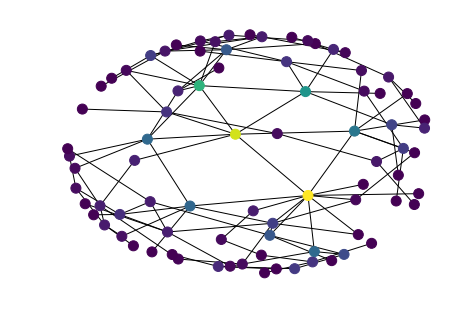

In [34]:
from scipy.linalg import eig

# c_e = list(nx.eigenvector_centrality(P).values())
# c_d = list(nx.degree_centrality(P).values())
c_b = list(nx.betweenness_centrality(P).values())
# c_c = list(nx.closeness_centrality(P).values())

# c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]
print(max(c_b)-min(c_b))
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

0.29702749991819527


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

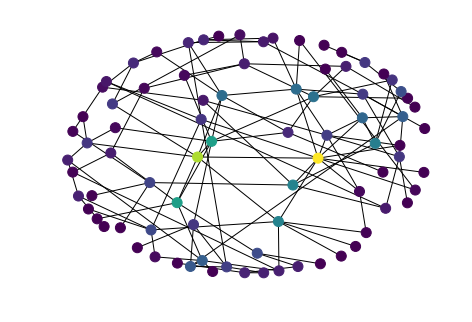

In [5]:
R = mutate_graph(P, 10)
c_b = list(nx.betweenness_centrality(R).values())
print(max(c_b) - min(c_b))

nx.draw(R, pos=pr_pos, node_size=100, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

In [3]:
# nx.draw(P, pos=pr_pos, node_size=100, node_color=c_e, cmap=plt.cm.viridis)
# plt.show()

# nx.draw(P, pos=pr_pos, node_size=100, node_color=c_c, cmap=plt.cm.viridis)
# plt.show()

# nx.draw(P, pos=pr_pos, node_size=100, node_color=c_ratio, cmap=plt.cm.viridis)
# plt.show()

# Import and Initialize GA

In [13]:
%run 'General_Genetic_Search.ipynb'

In [258]:
def pr_fitness_func(genome):
    # Convert genome to graph
    G = adj_list_to_graph(genome)
    # Calculate betweenness
    c_b = list(nx.betweenness_centrality(G).values())
    
    b_dist = max(c_b) - min(c_b)
    cost = new_cost(genome, graph_to_adj_list(P))
    
    return b_dist + cost/200


# Mean of c_b with vs without outliers

In [259]:
pr_fitness_func(graph_to_adj_list(P))

0.4205273798769734

In [260]:
# Generate starting networks
genomes = [graph_to_adj_list(mutate_graph(P, 1)) for i in range(100)]
print(len(genomes[0]))

# T = adj_list_to_graph(genomes[0])
# nx.draw(T, pos=pr_pos, node_size=100)
# plt.show()

# [new_cost(gene, graph_to_adj_list(P)) for gene in genomes]

3403


In [261]:
params = {
    'num_agents': 10,
    'fitness_function': pr_fitness_func,
    'gene_list': genomes,
    'constraints': None,
    'p_mut': .0005,
    'p_cross': .6,
    'repr_rate': 10,
    'max_iters': 300,
    'stop_tol': 10**(-8),
    'stop_tol_iters': 30
}

G = GeneticSearch(params)

In [270]:
G.step()
print(G.Population.fits)

[0.3515532059716129, 0.3655279689697034, 0.3655279689697034, 0.3739935697478607, 0.3590459461913843, 0.3952630665952588, 0.4149373561297681, 0.4076514966849204, 0.3590459461913843, 0.3952630665952588, 0.36150112609462204, 0.3544994315330566, 0.3394593437276364, 0.3281478722354965, 0.39897910363583355, 0.3281478722354965, 0.3281478722354965, 0.3952630665952588, 0.4076514966849204, 0.3515532059716129, 0.407502163810572, 0.3590459461913843, 0.3515532059716129, 0.3394593437276364, 0.39897910363583355, 0.3655279689697034, 0.43065570533050224, 0.35327333645310155, 0.43065570533050224, 0.3515532059716129, 0.3515532059716129, 0.3515532059716129, 0.3739935697478607, 0.39624539266815695, 0.3515532059716129, 0.3394593437276364, 0.3655279689697034, 0.4076514966849204, 0.3590459461913843, 0.31899114652953864, 0.4259430672709805, 0.35327333645310155, 0.3590459461913843, 0.3739935697478607, 0.3503218423317791, 0.39624539266815695, 0.4076514966849204, 0.4076514966849204, 0.4149373561297681, 0.41404049

In [271]:
[new_cost(agent.gene, graph_to_adj_list(P)) for agent in G.Population.agents]

[35.0,
 44.0,
 44.0,
 30.0,
 38.0,
 48.0,
 20.0,
 39.0,
 38.0,
 48.0,
 32.0,
 41.0,
 30.0,
 32.0,
 17.0,
 32.0,
 32.0,
 48.0,
 39.0,
 35.0,
 16.0,
 38.0,
 35.0,
 30.0,
 17.0,
 44.0,
 16.0,
 32.0,
 16.0,
 35.0,
 35.0,
 35.0,
 30.0,
 31.0,
 35.0,
 30.0,
 44.0,
 39.0,
 38.0,
 19.0,
 20.0,
 32.0,
 38.0,
 30.0,
 22.0,
 31.0,
 39.0,
 39.0,
 20.0,
 37.0,
 26.0,
 32.0,
 25.0,
 26.0,
 19.0,
 48.0,
 20.0,
 19.0,
 3.0,
 35.0,
 25.0,
 26.0,
 30.0,
 31.0,
 32.0,
 32.0,
 30.0,
 26.0,
 30.0,
 30.0,
 19.0,
 30.0,
 30.0,
 37.0,
 20.0,
 20.0,
 25.0,
 44.0,
 39.0,
 17.0,
 17.0,
 12.0,
 48.0,
 41.0,
 41.0,
 20.0,
 17.0,
 25.0,
 38.0,
 19.0,
 35.0,
 20.0,
 41.0,
 48.0,
 44.0,
 17.0,
 32.0,
 38.0,
 31.0,
 35.0,
 16.0]

In [272]:
E = adj_list_to_graph(G.Population.curr_elite.gene)
G.Population.curr_elite.fit

0.2881151450844314

0.2881151450844314


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

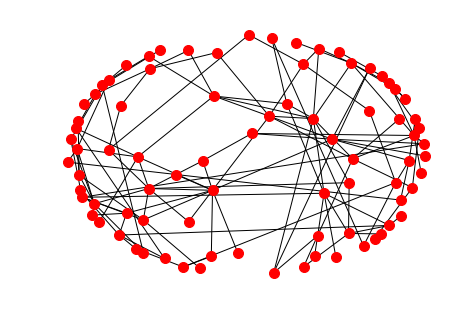

In [273]:
print(G.Population.curr_elite.fit)
nx.draw(E, pos=pr_pos, node_size=100)
plt.show()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

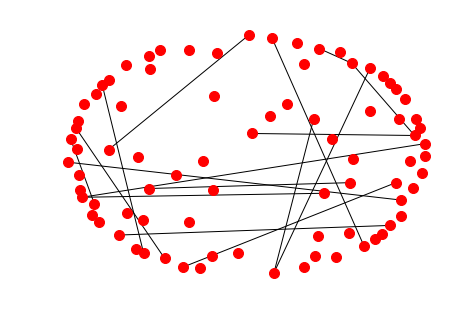

In [274]:
plot_diff(E, P)

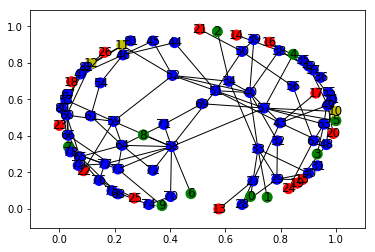

In [275]:
nx.draw_networkx(P, pos=pr_pos, node_size=100, node_color=pr_colors)
plt.show()